Chapter 21
# 度分析
Book_6《数据有道》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
G = nx.gnp_random_graph(100, 0.02, seed=8)
# 创建随机图

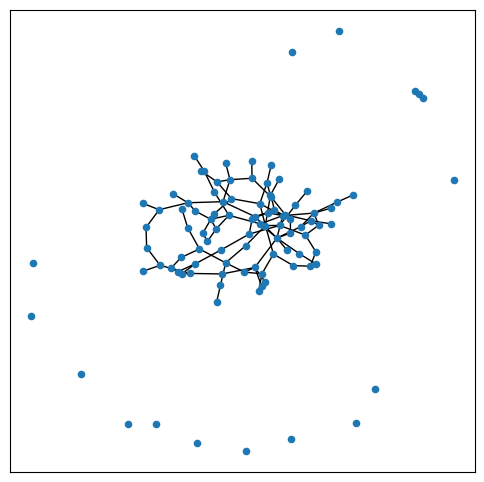

In [3]:
plt.figure(figsize = (6,6))
pos = nx.spring_layout(G, seed = 8)
nx.draw_networkx(G, pos, 
                 with_labels = False,
                 node_size=20)
plt.savefig('全图.svg')

## 连通分量

In [4]:
Gcc = G.subgraph(sorted(nx.connected_components(G), 
                        key=len, reverse=True)[0])

In [5]:
num_nodes = [len(c) for c in 
             sorted(nx.connected_components(G), 
                    key=len, reverse=True)]

In [15]:
num_nodes

[84, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [6]:
pos_Gcc = {k: pos[k] for k in list(Gcc.nodes())}
# 取出子图节点坐标

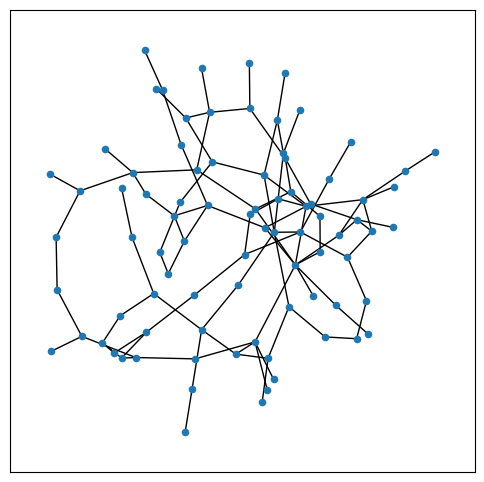

In [7]:
plt.figure(figsize = (6,6))
nx.draw_networkx(Gcc, pos_Gcc, 
                 with_labels = False,
                 node_size=20)
plt.savefig('最大连通分量.svg')

## 度分析

In [8]:
degree_sequence = sorted((d for n, d in G.degree()), 
                         reverse=True)
# 度数大小排序

In [8]:
dmax = max(degree_sequence)

In [9]:
dict_degree = dict(G.degree())
# 将结果转为字典

In [10]:
set(degree_sequence)

{0, 1, 2, 3, 4, 5, 8}

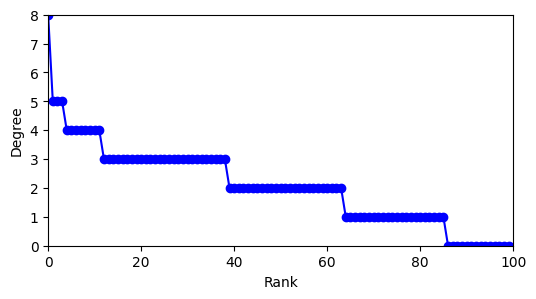

In [11]:
fig, ax = plt.subplots(figsize = (6,3))
ax.plot(degree_sequence, "b-", marker="o")
ax.set_ylabel("Degree")
ax.set_xlabel("Rank")
ax.set_xlim(0,100)
ax.set_ylim(0,8)
plt.savefig('度数等级图.svg')

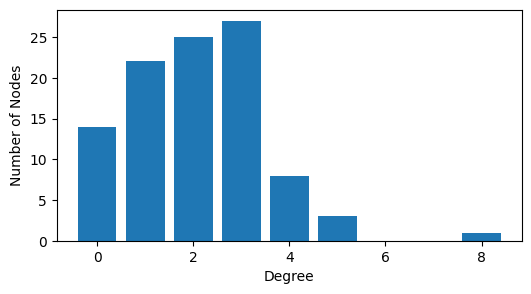

In [12]:
fig, ax = plt.subplots(figsize = (6,3))
ax.bar(*np.unique(degree_sequence, return_counts=True))
ax.set_xlabel("Degree")
ax.set_ylabel("Number of Nodes")
plt.savefig('度数柱状图.svg')

## 根据度数渲染节点

In [13]:
# 自定义函数，过滤dict
def filter_value(dict_, unique):
    
    newDict = {}
    for (key, value) in dict_.items():
        if value == unique:
            newDict[key] = value
            
    return newDict

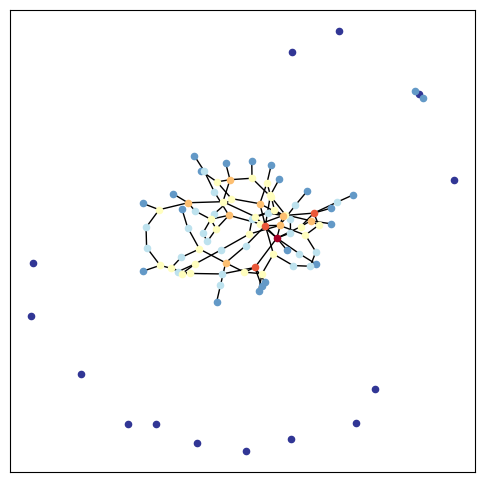

In [17]:
# 根据度数大小渲染节点
unique_deg = set(degree_sequence)
# 取出节点度数独特值

colors = plt.cm.RdYlBu_r(np.linspace(0, 1, len(unique_deg)))
# 独特值的颜色映射

plt.figure(figsize = (6,6))
nx.draw_networkx_edges(G, pos)
# 绘制图的边

# 分别绘制不同度数节点
for deg_i, color_i in zip(unique_deg,colors):
    
    dict_i = filter_value(dict_degree,deg_i)
    nx.draw_networkx_nodes(G, pos, 
                           nodelist = list(dict_i.keys()), 
                           node_size=20,
                           node_color = color_i)
plt.savefig('根据度数大小渲染节点.svg')

参考：
https://networkx.org/documentation/stable/auto_examples/drawing/plot_degree.html